## Importing / Installing packages

In [2]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

In [3]:
dataset = 'Dataset/Initial Dataset (corrected)/corrected_data_bikroy_com.csv'

In [4]:
df1 = pd.read_csv(dataset)

In [5]:
df1.head()

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota Fielder 2011,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota Noah 2005,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
2,Toyota LiteAce 2001,Toyota,LiteAce,2001,Manual,NaN,CNG,1800,102000,165000
3,Maruti Suzuki Vitara Brezza 1994,Maruti Suzuki,Vitara Brezza,1994,Manual,NaN,CNG,1600,113000,230000
4,Toyota Starlet good 1992,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000


In [6]:
df1.columns

Index(['car_name', 'brand', 'car_model', 'model_year', 'transmission',
       'body_type', 'fuel_type', 'engine_capacity', 'kilometers_run', 'price'],
      dtype='object')

In [7]:
df1.nunique()

car_name           1108
brand                26
car_model           123
model_year           35
transmission          2
body_type             7
fuel_type            24
engine_capacity      51
kilometers_run      640
price               519
dtype: int64

## Exploratory Data Analysis

In [8]:
df2 = df1.drop(['car_name'],axis=1)
df2.head()

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
2,Toyota,LiteAce,2001,Manual,NaN,CNG,1800,102000,165000
3,Maruti Suzuki,Vitara Brezza,1994,Manual,NaN,CNG,1600,113000,230000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000


In [9]:
df2.isnull().any()

brand              False
car_model          False
model_year         False
transmission       False
body_type           True
fuel_type          False
engine_capacity    False
kilometers_run     False
price              False
dtype: bool

In [10]:
df2.isnull().sum()

brand               0
car_model           0
model_year          0
transmission        0
body_type          18
fuel_type           0
engine_capacity     0
kilometers_run      0
price               0
dtype: int64

In [11]:
# Dropping 18 Nan Value Containing Rows
df2 = df2.dropna(how='any',axis=0) 
df2.isnull().sum()

brand              0
car_model          0
model_year         0
transmission       0
body_type          0
fuel_type          0
engine_capacity    0
kilometers_run     0
price              0
dtype: int64

In [12]:
df2.shape
df2.head(20)

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000
5,Toyota,Carina,1998,Automatic,Saloon,CNG,1500,60720,200000
6,Toyota,Corolla,2009,Automatic,Saloon,CNG,1500,70000,950000
7,Mitsubishi,Pajero,2000,Manual,SUV / 4x4,CNG,2350,750000,960000
8,Toyota,Axio,2016,Automatic,Saloon,"CNG, Hybrid",1500,96000,1830000
9,Toyota,Other Model,1996,Automatic,Estate,"CNG, Octane",1331,120000,350000
10,Toyota,Fielder,2001,Automatic,Estate,"CNG, Octane",1500,75000,799000
11,Toyota,Fielder,2001,Automatic,Estate,"CNG, Octane",1500,79250,785000


### Checking for data consistency

In [13]:
df2.nunique()

brand               24
car_model          120
model_year          35
transmission         2
body_type            7
fuel_type           24
engine_capacity     50
kilometers_run     632
price              513
dtype: int64

In [14]:
df2.car_model.unique()

array(['Fielder', 'Noah', 'Starlet', 'Carina', 'Corolla', 'Pajero',
       'Axio', 'Other Model', 'Succeed', 'Probox', 'Spacio', 'Wish',
       'Raum', 'Starlet Soleil', 'CR-V', 'Alto', 'ist', 'Rush', 'LiteAce',
       'TownAce', 'Hiace', 'Sienta', 'l300', 'MPV', 'Dyna', 'Avanza',
       'Urvan', 'Sprinter', 'Mark II', 'Corsa', 'Corona', 'Vista',
       'Allion', 'Premio', 'Crown', 'Lancer', 'X Assista', 'Fit', 'Sunny',
       'WagonR', 'Pathfinder', 'Prado', 'V6', 'Cami', 'Carryboy',
       'Kluger', 'RAV4', 'CX-7', 'Hilux', 'Estima', 'l200', 'H1',
       'Coaster', '5 Series', 'Indigo Ecs', 'Terrano', 'X-Trail',
       'Land Cruiser', 'Eco Sport', 'Kyron', 'Harrier', 'Prius', 'Aqua',
       'Esquire', 'Grace', 'Axela', 'CR-Z', 'C-HR', 'Alphard', 'Camry',
       'Vezel', 'NX', 'Outlandar', 'S660', 'RX-8', 'Note', 'Vitz',
       'Alto 800', 'Passo', 'RunX', 'Tiida', 'Swift', 'Spark', 'Ractis',
       'HR-V', 'MR2', 'City', '320i', 'Civic', 'Bluebird', 'GLX',
       'Sonata', 'Accent', 

In [15]:
df2.transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [16]:
df2.body_type.unique()

array(['Estate', 'Hatchback', 'Saloon', 'SUV / 4x4', 'MPV', 'Convertible',
       'Coupé/Sports'], dtype=object)

In [17]:
df2.fuel_type.unique()

array(['CNG', 'CNG, Hybrid', 'CNG, Octane', 'Diesel', 'Diesel, Petrol',
       'Hybrid', 'Hybrid, Octane', 'Hybrid, Octane, LPG', 'LPG', 'Octane',
       'Octane, LPG', 'Octane, Other fuel type', 'Petrol', 'Petrol, CNG',
       'Petrol, CNG, Octane', 'Petrol, CNG, Octane, LPG',
       'Petrol, Hybrid', 'Petrol, Hybrid, Octane',
       'Petrol, Hybrid, Octane, LPG', 'Petrol, LPG', 'Petrol, Octane',
       'Petrol, Octane, LPG', 'Petrol, Octane, Other fuel type',
       'Petrol, Other fuel type'], dtype=object)

In [18]:
df2.engine_capacity.unique()

array([1500, 1998, 1300, 2350, 1331, 1800, 1000, 2000,  150, 2500, 1781,
       1996, 1990, 2400, 1600, 1490, 1900, 1830, 1586, 1580, 1984, 1061,
       1496, 3300, 3500, 2260, 4200, 2200, 3000, 2700, 2389, 2779, 3700,
       4500, 1797, 2015,  660, 2367,  800, 1329, 1100, 1590, 1200, 1320,
       1400, 1499, 3400, 2972, 2362, 2490])

### Data Preprocessing : Fuel Type

In [19]:
df2['car_model'].value_counts()

Premio       143
Axio         118
Allion       105
Noah          93
Corolla       90
            ... 
Outlander      1
Eco Sport      1
Murano         1
Insight        1
Spark          1
Name: car_model, Length: 120, dtype: int64

In [20]:
# removing values that only occurs once
df2 = df2[df2.groupby('car_model').car_model.transform('count') > 1]

In [21]:
df2['car_model'].value_counts()

Premio      143
Axio        118
Allion      105
Noah         93
Corolla      90
           ... 
WagonR        2
Wish          2
Avanza        2
Bluebird      2
Yaris         2
Name: car_model, Length: 65, dtype: int64

In [22]:
df2['body_type'].value_counts()

Saloon         606
MPV            193
SUV / 4x4      182
Estate          77
Hatchback       76
Convertible      2
Name: body_type, dtype: int64

In [23]:
df3 = df2[df2.groupby('body_type').body_type.transform('count') > 2]
df3['body_type'].value_counts()

Saloon       606
MPV          193
SUV / 4x4    182
Estate        77
Hatchback     76
Name: body_type, dtype: int64

In [24]:
df3['fuel_type'].value_counts()

CNG, Octane                        391
Octane                             246
Petrol, Octane                     116
Hybrid, Octane                      93
Petrol, Hybrid, Octane              62
Hybrid                              55
Petrol, CNG, Octane                 52
Petrol, CNG                         28
Diesel                              24
Octane, LPG                         22
Petrol                              21
CNG                                  6
Octane, Other fuel type              4
Petrol, Octane, LPG                  3
Petrol, Other fuel type              2
CNG, Hybrid                          1
Petrol, Hybrid, Octane, LPG          1
Petrol, Hybrid                       1
LPG                                  1
Hybrid, Octane, LPG                  1
Petrol, LPG                          1
Petrol, CNG, Octane, LPG             1
Petrol, Octane, Other fuel type      1
Diesel, Petrol                       1
Name: fuel_type, dtype: int64

In [25]:
df4 = df3[df3.groupby('fuel_type').fuel_type.transform('count') > 2]
df4['fuel_type'].value_counts()

CNG, Octane                391
Octane                     246
Petrol, Octane             116
Hybrid, Octane              93
Petrol, Hybrid, Octane      62
Hybrid                      55
Petrol, CNG, Octane         52
Petrol, CNG                 28
Diesel                      24
Octane, LPG                 22
Petrol                      21
CNG                          6
Octane, Other fuel type      4
Petrol, Octane, LPG          3
Name: fuel_type, dtype: int64

In [26]:
# Replacing Values by following Condtions
df4.loc[df4['fuel_type'] == 'CNG, Octane', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'CNG', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'Octane', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Petrol, Octane', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Hybrid, Octane', 'fuel_type'] = 'HYBRID'
df4.loc[df4['fuel_type'] == 'Petrol, Hybrid, Octane', 'fuel_type'] = 'HYBRID'
df4.loc[df4['fuel_type'] == 'Hybrid', 'fuel_type'] = 'HYBRID'
df4.loc[df4['fuel_type'] == 'Petrol, CNG, Octane', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'Diesel', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Petrol, CNG', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'Petrol', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Octane, LPG', 'fuel_type'] = 'LPG and OIL'
df4.loc[df4['fuel_type'] == 'Petrol, Octane, LPG', 'fuel_type'] = 'LPG and OIL'
df4.loc[df4['fuel_type'] == 'Octane, Other fuel type', 'fuel_type'] = 'OIL'

df4['fuel_type'].value_counts()

/home/s_da_sailor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


CNG and OIL    477
OIL            411
HYBRID         210
LPG and OIL     25
Name: fuel_type, dtype: int64

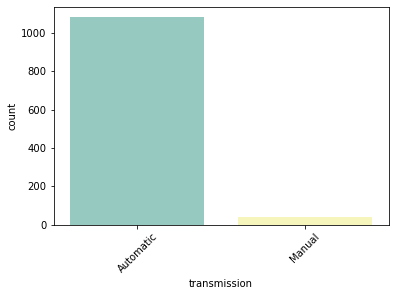

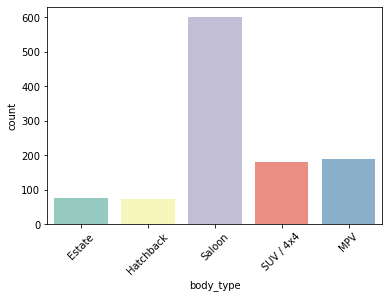

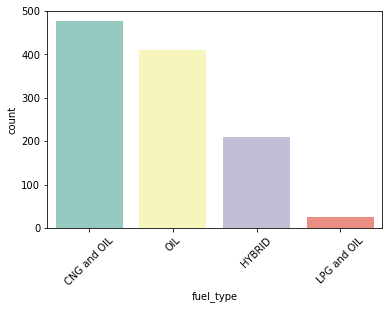

In [27]:
 #Looping through all the features by our y variable - see if there is relationship

features = [ 'transmission','body_type', 'fuel_type']

for f in features:
    sns.countplot(x = f, data = df4, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

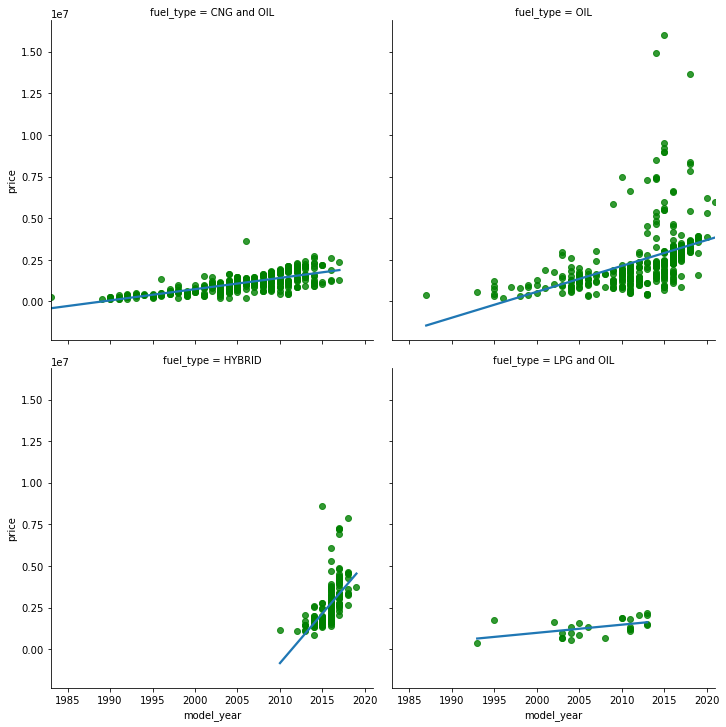

In [28]:
# Visualising a Subset of our data - important featuresz
g = sns.lmplot(x = 'model_year', y = 'price', data = df4, col = 'fuel_type', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

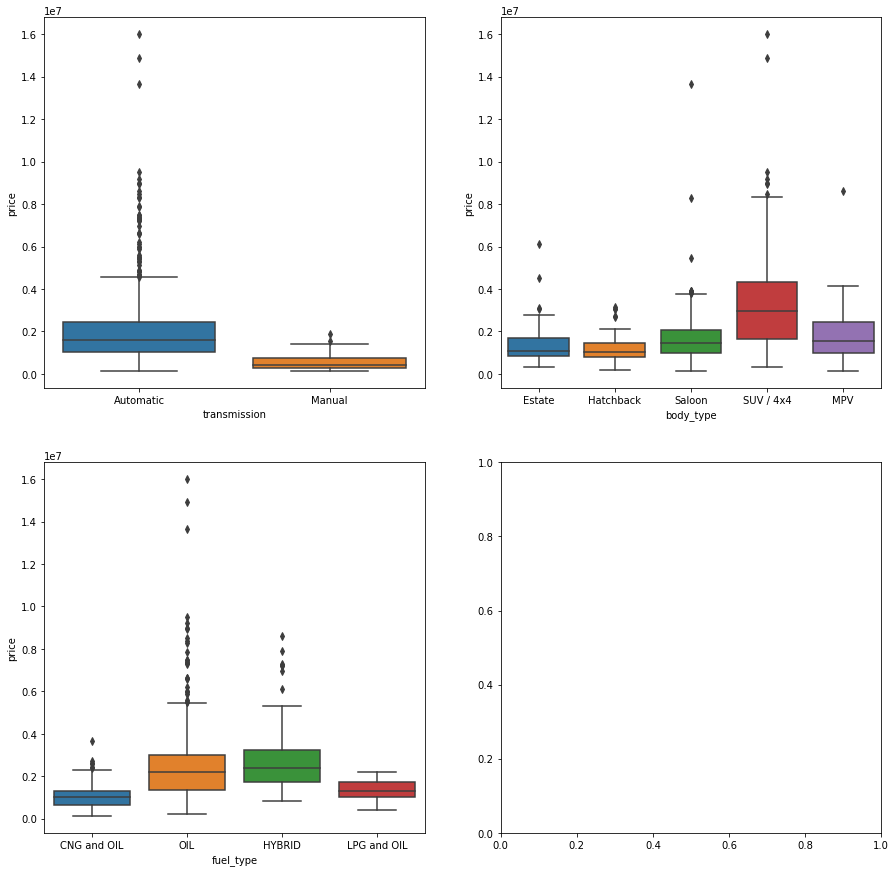

In [29]:
categorical = [ 'transmission','body_type', 'fuel_type']
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = var, y='price', data = df4, ax = subplot)

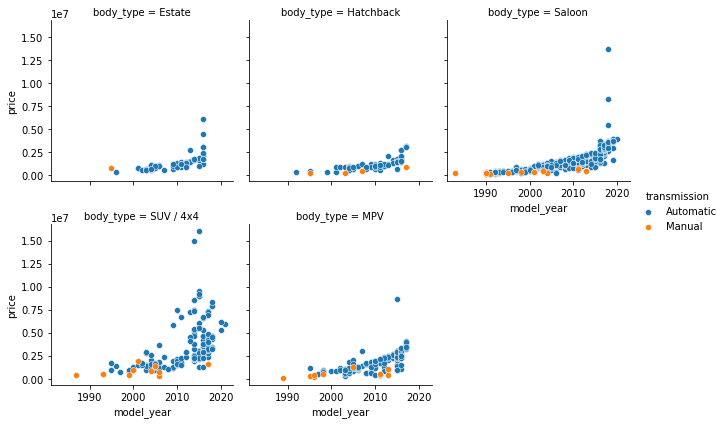

In [30]:
cond_plot = sns.FacetGrid(data=df4, col='body_type', hue = 'transmission', col_wrap=3)
cond_plot.map(sns.scatterplot, 'model_year', 'price');
cond_plot.add_legend()

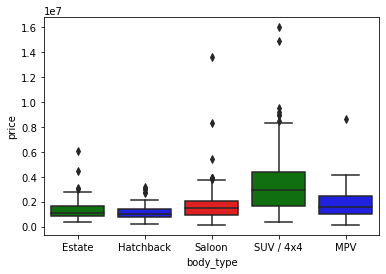

In [31]:
# Investigate the distribution of price by Categorical Variables

pal = ['green', 'blue', 'red']
g = sns.boxplot(x = 'body_type', y = 'price', data = df4, palette = pal)

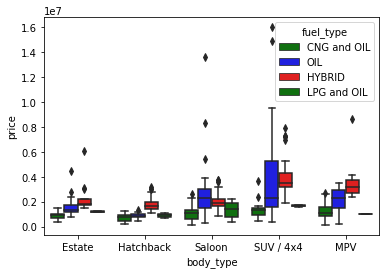

In [32]:
g = sns.boxplot(x = 'body_type', y = 'price', hue = 'fuel_type', data = df4, palette = pal)

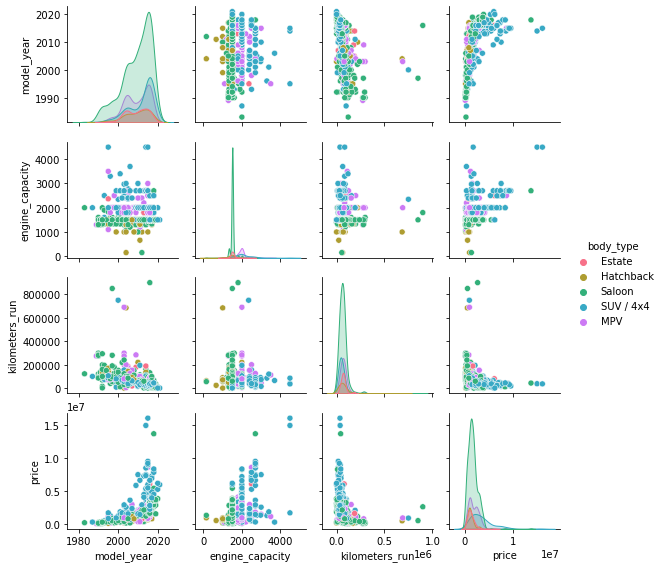

In [33]:
# By Body Type
sns.pairplot(df4,hue = 'body_type',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()

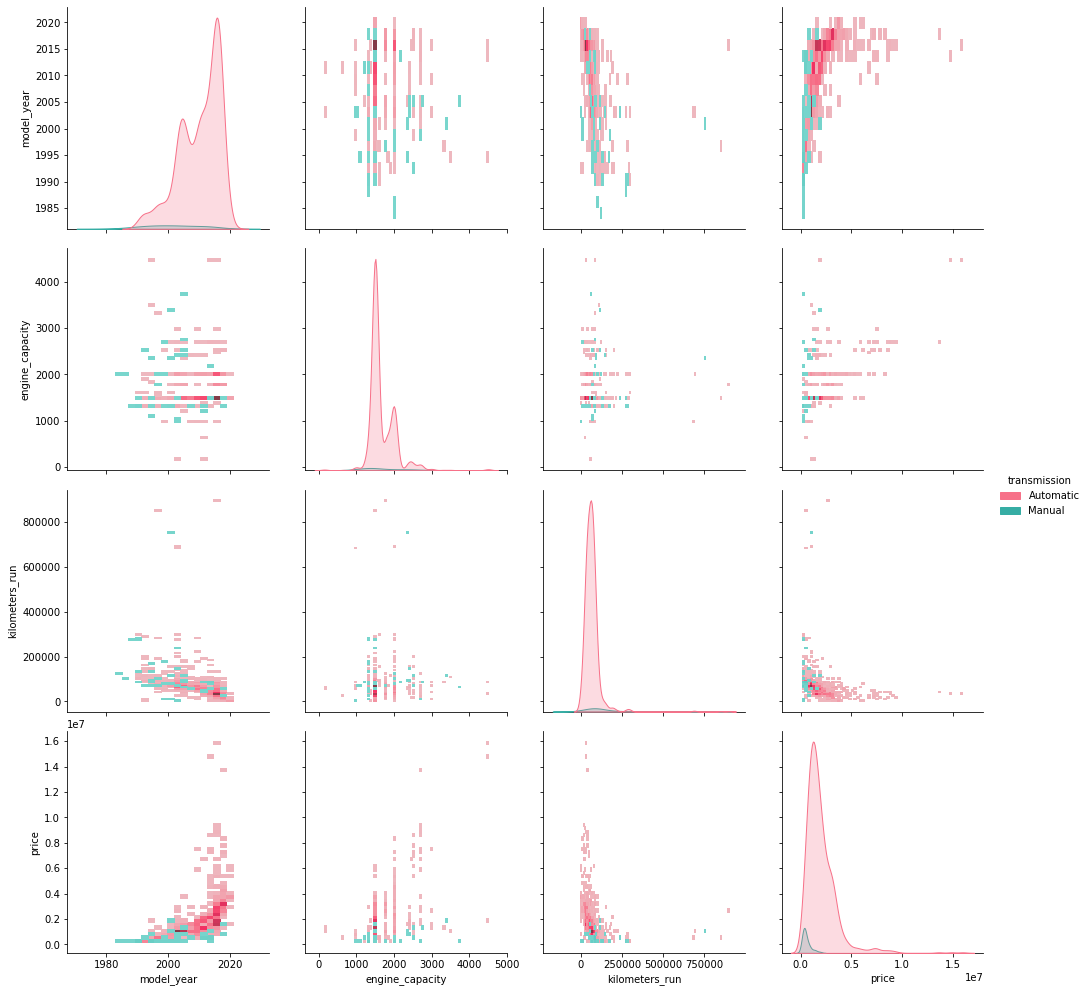

In [34]:
# By Transmission
sns.pairplot(df4,hue = 'transmission',diag_kind = "kde",kind = "hist",palette = "husl",height=3.5)
plt.show()

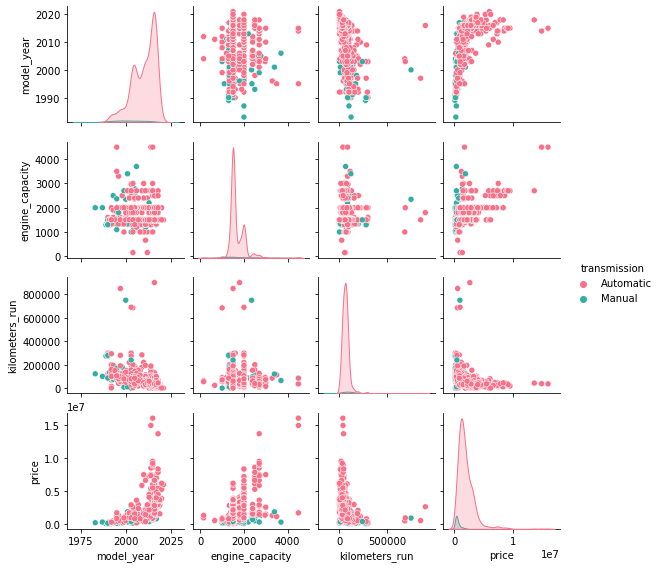

In [35]:
# By Transmission
sns.pairplot(df4,hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

In [36]:
manual = df4[df4['transmission'] == 'Manual']
automatic = df4[df4['transmission'] == 'Automatic']
hue_order_fuel_type = ['CNG and OIL', 'OIL', 'HYBRID', 'LPG and OIL']

Manual type car


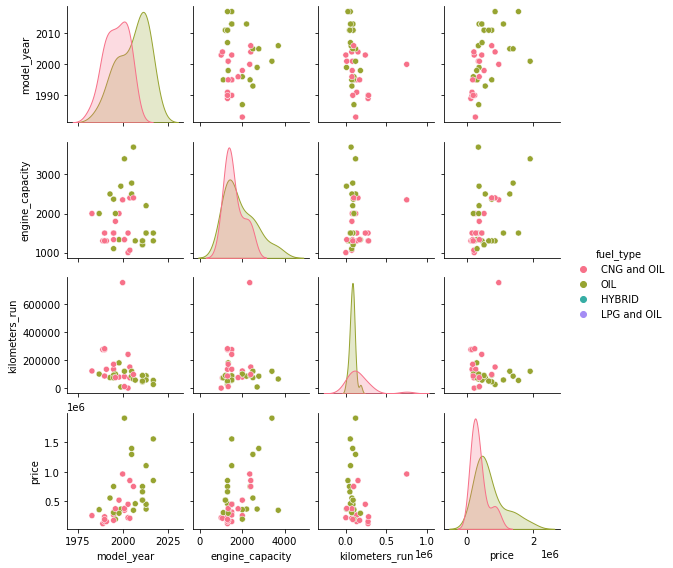

In [37]:
print('Manual type car')
sns.pairplot(manual,hue ='fuel_type', hue_order = hue_order_fuel_type ,diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

Automatic type car


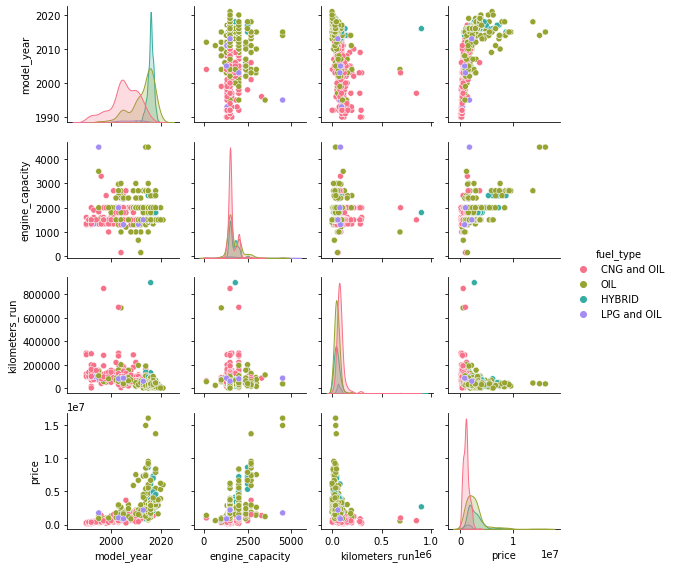

In [38]:
print('Automatic type car')
sns.pairplot(automatic , hue = 'fuel_type', hue_order = hue_order_fuel_type , diag_kind = "kde" , kind = "scatter" , palette = "husl" , height=2)
plt.show()

## Data Preprocessing : Year and Kilometers_run

In [40]:
df4.head()

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG and OIL,1500,45852,1200000
1,Toyota,Noah,2010,Automatic,Hatchback,CNG and OIL,1998,219630,1200000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG and OIL,1300,15000,330000
5,Toyota,Carina,1998,Automatic,Saloon,CNG and OIL,1500,60720,200000
6,Toyota,Corolla,2009,Automatic,Saloon,CNG and OIL,1500,70000,950000


In [41]:
km_mean = df4.groupby('model_year')['kilometers_run'].mean()

/home/s_da_sailor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/s_da_sailor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


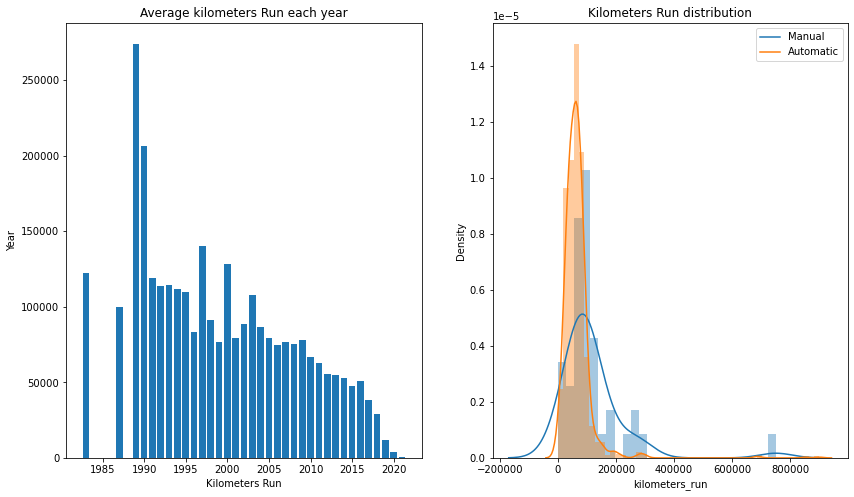

In [42]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['kilometers_run'],ax=ax[1])
sns.distplot(automatic['kilometers_run'],ax=ax[1])

ax[0].set_title('Average kilometers Run each year')
ax[0].set_xlabel('Kilometers Run')
ax[0].set_ylabel('Year')

ax[1].set_title('Kilometers Run distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()

## Data Preprocessing : Model Year and Selling Price

In [43]:
year_mean_manual = df4[df4['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = df4[df4['transmission']=='Automatic'].groupby('model_year')['price'].mean()

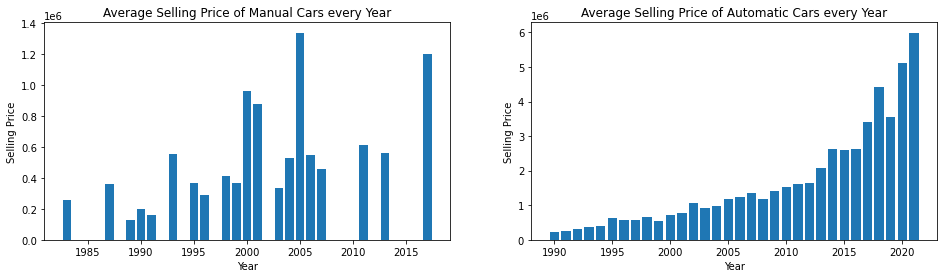

In [44]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

## Data Preprocessing : Data Cleaning || Removing Outliers

In [45]:
df4 = df4.drop(df4[(df4['price'] > 7500000) & (df4['body_type'] == 'Saloon')].index)
df4 = df4.drop(df4[(df4['price'] > 12500000) & (df4['body_type'] == 'SUV / 4x4')].index)

In [46]:
df4.groupby('transmission').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['model_year'],axis=1)

engine_capacity                  kilometers_run               \
                        mean  std   min   max           mean     std  min   
transmission                                                                
Automatic               1657  328   150  4500          65430   56651    6   
Manual                  1759  636  1000  3700         117819  119803  200   

                        price                            
                 max     mean      std     min      max  
transmission                                             
Automatic     900000  1908039  1343640  135000  9500000  
Manual        750000   545026   403285  125000  1900000

In [47]:
def remove_outlier_km_driven(df):
    temp = pd.DataFrame()
    
    df_km_driven = df['kilometers_run']
    Q1 = df_km_driven.quantile(0.25)
    Q3 = df_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_km_driven[(df_km_driven < (Q1 - 1.5 * IQR)) | (df_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df5 = remove_outlier_km_driven(df4)

In [48]:
def remove_outlier_selling_price(df):
    temp = pd.DataFrame()
    for year in sorted(df.model_year.unique()):
        year_price_manual = df[(df['model_year']==year) & (df['transmission']=='Manual')]['price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = df[(df['model_year']==year) & (df['transmission']=='Automatic')]['price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return df.drop(temp.index)

df6 = remove_outlier_selling_price(df5)

In [49]:
year_mean_manual = df6[df6['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = df6[df6['transmission']=='Automatic'].groupby('model_year')['price'].mean()

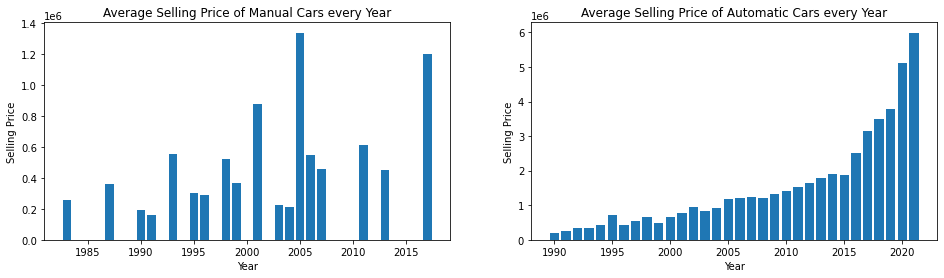

In [50]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [51]:
# we can also safely remove the datapoints before 1990 since it produces inconsistency and the data points

df7 = df6[df6['model_year']>1990]

In [52]:
year_mean_manual_price = df7[df7['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic_price = df7[df7['transmission']=='Automatic'].groupby('model_year')['price'].mean()
year_mean_manual_km = df7[df7['transmission']=='Manual'].groupby('model_year')['kilometers_run'].mean()
year_mean_automatic_km = df7[df7['transmission']=='Automatic'].groupby('model_year')['kilometers_run'].mean()

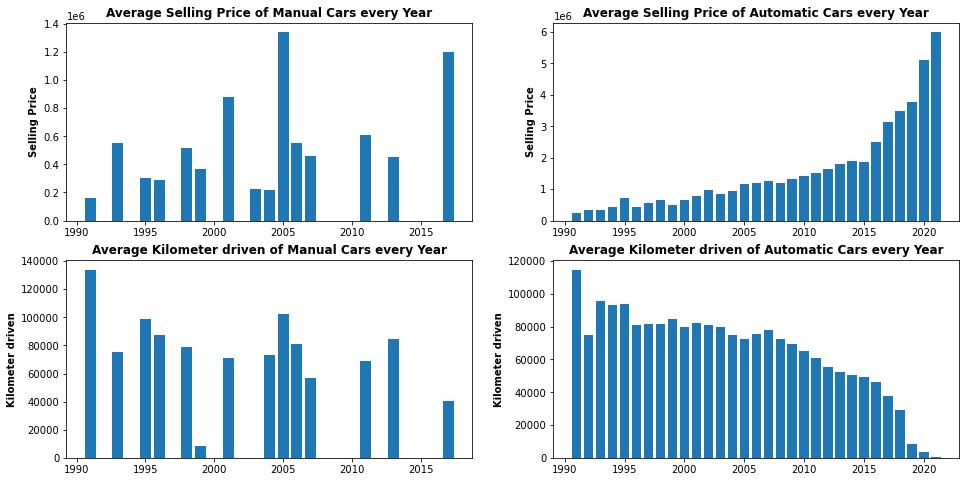

In [53]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year' ,fontweight='bold')
ax[0][0].set_ylabel('Selling Price' ,fontweight='bold')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year' ,fontweight='bold')
ax[0][1].set_ylabel('Selling Price' ,fontweight='bold')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year' ,fontweight='bold')
ax[1][0].set_ylabel('Kilometer driven' ,fontweight='bold')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year' ,fontweight='bold')
ax[1][1].set_ylabel('Kilometer driven' ,fontweight='bold')

plt.show()

In [54]:
manual = df7[df7['transmission']=='Manual']
automatic = df7[df7['transmission']=='Automatic']

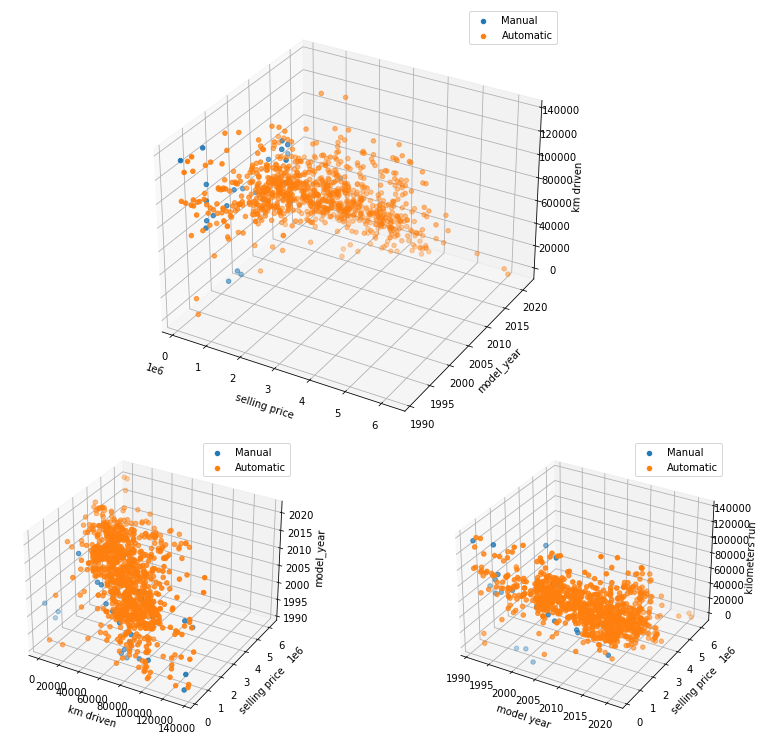

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_axes([0.2,0,1.5,1.5], projection='3d')

ax.scatter(manual['price'],manual['model_year'],manual['kilometers_run'])
ax.scatter(automatic['price'],automatic['model_year'],automatic['kilometers_run'])

ax.set_xlabel('selling price')
ax.set_ylabel('model_year')
ax.set_zlabel('km driven')

ax.legend(['Manual','Automatic'])

ax=fig.add_axes([0,-1,1,1], projection='3d')

ax.scatter(manual['kilometers_run'],manual['price'],manual['model_year'])
ax.scatter(automatic['kilometers_run'],automatic['price'],automatic['model_year'])

ax.set_xlabel('km driven')
ax.set_ylabel('selling price')
ax.set_zlabel('model_year')

ax.legend(['Manual','Automatic'])

ax=fig.add_axes([1,-1,1,1], projection='3d')

ax.scatter(manual['model_year'],manual['price'],manual['kilometers_run'])
ax.scatter(automatic['model_year'],automatic['price'],automatic['kilometers_run'])

ax.set_xlabel('model year')
ax.set_ylabel('selling price')
ax.set_zlabel('kilometers run')

ax.legend(['Manual','Automatic'])

plt.show()

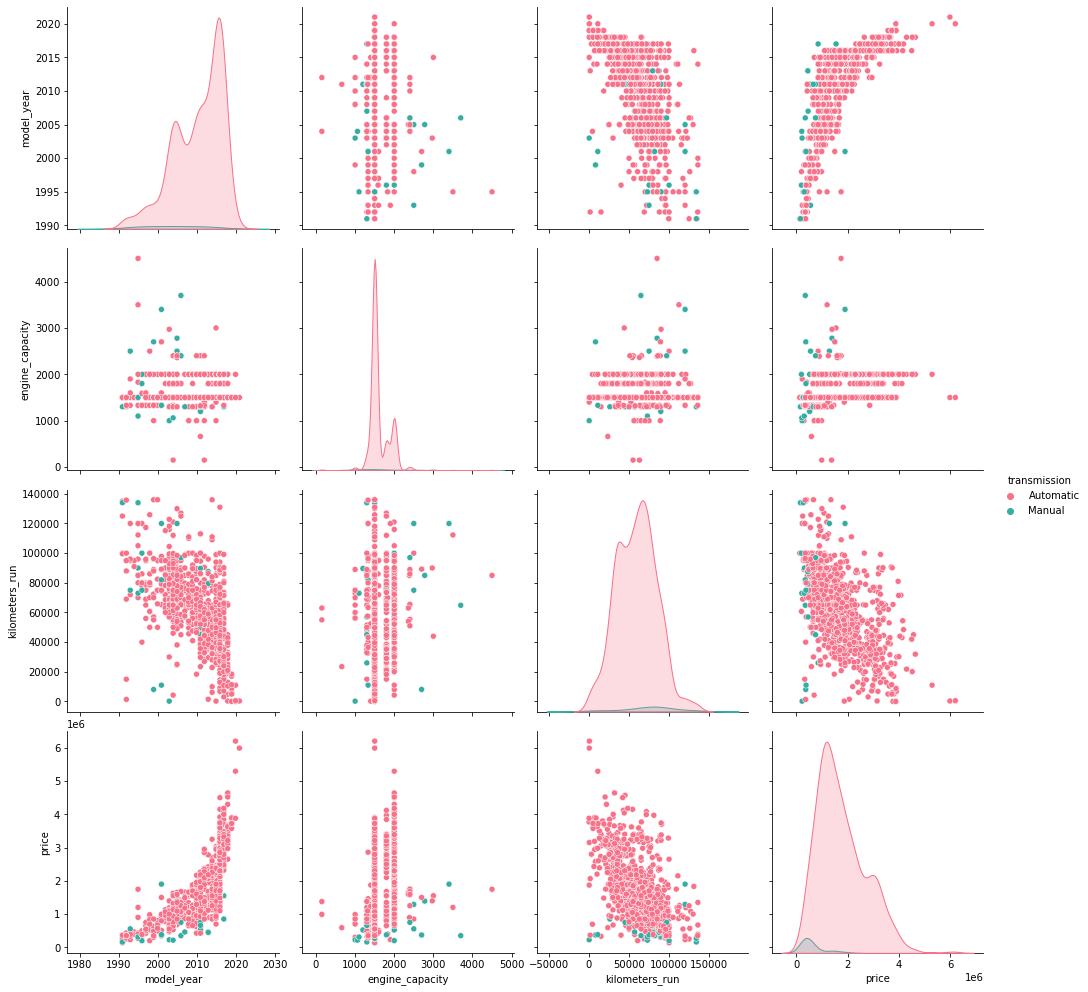

In [56]:
sns.pairplot(df7,hue='transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

In [57]:
df7.head()

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG and OIL,1500,45852,1200000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG and OIL,1300,15000,330000
5,Toyota,Carina,1998,Automatic,Saloon,CNG and OIL,1500,60720,200000
6,Toyota,Corolla,2009,Automatic,Saloon,CNG and OIL,1500,70000,950000
9,Toyota,Other Model,1996,Automatic,Estate,CNG and OIL,1331,120000,350000


In [ ]:
categorical_columns = ['brand','body_type','car_model']
le = LabelEncoder()

for feat in categorical_columns:
    df7[feat] = le.fit_transform(df7[feat].astype(str))



transmission = pd.get_dummies(df7['transmission'])
fuel = pd.get_dummies(df7['fuel_type'])

X = pd.concat([transmission,fuel,df7.drop(['transmission','fuel_type','price'],axis=1)],axis=1)
y = df7['price']